# [ICTCOG AI Academy] 7기 고급시각저녁반

#  영상 처리/딥러닝을 위한 Vectorize 기법 (1)
- Numpy.pdf 참고

### 영상처리 입문
####  DIP(Digital Image Processing) 
-  컴퓨터를 이용한 디지털 이미지를 처리

#### Image 
- 함수

- bitmap 방식
  - matrix 기반(좌표값으로 매칭됨)

  - 저수준으로 행렬을 다루기 위해서 Numpy 포맷으로 가져옴.

In [ ]:
import matplotlib.pyplot as plt # 그래프 라이브러리

- 경로
  - 작업공간과 동일한 위치인 경우 생략 가능
- 파일명
- 확장자

In [ ]:
img= plt.imread('dog.jpg')  #이미지를 Numpy array 형태로 변경
img

array([[[231, 232, 237],
        [231, 232, 237],
        [232, 233, 238],
        ...,
        [222, 222, 222],
        [222, 222, 222],
        [222, 222, 222]],

       [[231, 232, 237],
        [231, 232, 237],
        [232, 233, 238],
        ...,
        [222, 222, 222],
        [222, 222, 222],
        [222, 222, 222]],

       [[231, 232, 237],
        [231, 232, 237],
        [232, 233, 238],
        ...,
        [222, 222, 222],
        [222, 222, 222],
        [222, 222, 222]],

       ...,

       [[242, 245, 252],
        [242, 245, 252],
        [242, 245, 252],
        ...,
        [226, 231, 237],
        [226, 231, 237],
        [226, 231, 237]],

       [[242, 245, 252],
        [242, 245, 252],
        [241, 244, 251],
        ...,
        [226, 231, 237],
        [226, 231, 237],
        [226, 231, 237]],

       [[241, 244, 251],
        [241, 244, 251],
        [241, 244, 251],
        ...,
        [226, 231, 237],
        [226, 231, 237],
        [225, 230, 236]]

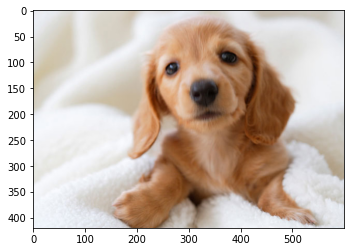

In [ ]:
plt.imshow(img)

In [ ]:
# 좌측 하단을 crop
img2=img[200:400,100:300,:]

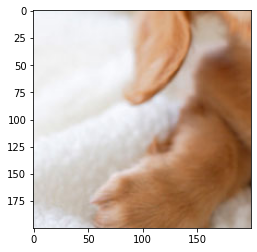

In [ ]:
plt.imshow(img2)

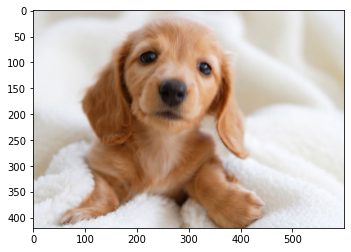

In [ ]:
#좌우반전
img2=img[:,::-1,:]
plt.imshow(img2)

In [ ]:
 '123'+'234'

'123234'

In [ ]:
3*'123'

'123123123'

### homogenous Sequence Type
- 원소의 **데이터 타입이 동일**해야함
- 동일하지 않는 경우 자동으로 맞추어줌

  - Python은 다양한 데이터 타입을 가져오기 때문에 데이터 타입을 체크, 메모리 공간이 다르기 때문에 속도가 느림


In [ ]:
import numpy as np

In [ ]:
np.array([1,2,'1'])  #homogeneous 이기 때문에 숫자를 문자열로 자동 변환

array(['1', '2', '1'], dtype='<U21')

In [ ]:
import tensorflow as tf

In [ ]:
tf.constant([1,2,'1'])  #mixed types 은 Tensor에서 불가. 

ValueError: ignored

- shape
- dtype

In [ ]:
tf.constant([1,2,1])    # shape=(3,) , dtype=int32

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 1], dtype=int32)>

In [ ]:
np.array([1,2,3])+np.array([1,2,3]) # elementwise 연산

array([2, 4, 6])

#### Vectorization
- 하나의 내부적으로 **동시에 n개를 처리**할 수 있어서 연산 횟수가 줄어듦.
- Numpy: CPU 기반 Vectorization
  - core 갯수
- Tensor GPU 기반 Vectorization
  - NVIDIA 계열의 GPU의 CUDA 코어 갯수

### Numpy array
- 공백 존재 ->matrix 기반인 Matlab 참조(디폴트)
  - 직관적

1. 데이터 포맷: `array ( ) `  Numpy  데이터 포맷
2. 차원: `[ ]` 갯수로 차원 유추
  - 흑백: 2차원/3차원
    - x,y,1
    - x,y
  - 칼라: 3차원 
    - x,y,3

In [ ]:
img  #shape   한번에 알기 어려움

array([[[231, 232, 237],
        [231, 232, 237],
        [232, 233, 238],
        ...,
        [222, 222, 222],
        [222, 222, 222],
        [222, 222, 222]],

       [[231, 232, 237],
        [231, 232, 237],
        [232, 233, 238],
        ...,
        [222, 222, 222],
        [222, 222, 222],
        [222, 222, 222]],

       [[231, 232, 237],
        [231, 232, 237],
        [232, 233, 238],
        ...,
        [222, 222, 222],
        [222, 222, 222],
        [222, 222, 222]],

       ...,

       [[242, 245, 252],
        [242, 245, 252],
        [242, 245, 252],
        ...,
        [226, 231, 237],
        [226, 231, 237],
        [226, 231, 237]],

       [[242, 245, 252],
        [242, 245, 252],
        [241, 244, 251],
        ...,
        [226, 231, 237],
        [226, 231, 237],
        [226, 231, 237]],

       [[241, 244, 251],
        [241, 244, 251],
        [241, 244, 251],
        ...,
        [226, 231, 237],
        [226, 231, 237],
        [225, 230, 236]]

In [ ]:
tf.keras.datasets.mnist.load_data() # Numpy  데이터 포맷

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
import seaborn as sns
tips= sns.load_dataset('tips')
tips.values   #  Numpy  데이터 포맷

array([[16.99, 1.01, 'Female', ..., 'Sun', 'Dinner', 2],
       [10.34, 1.66, 'Male', ..., 'Sun', 'Dinner', 3],
       [21.01, 3.5, 'Male', ..., 'Sun', 'Dinner', 3],
       ...,
       [22.67, 2.0, 'Male', ..., 'Sat', 'Dinner', 2],
       [17.82, 1.75, 'Male', ..., 'Sat', 'Dinner', 2],
       [18.78, 3.0, 'Female', ..., 'Thur', 'Dinner', 2]], dtype=object)

In [ ]:
np.arange(24).reshape(2,12)  #2차원 데이터 2x12 행렬

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

In [ ]:
np.arange(24).reshape(2,3,4) #3차원 데이터 : 2개의 3x4 행렬

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

#### np.printoptions
- ... Ellipsis : 줄여서 표현 
> - with : context manager
    - `__enter__ , __exit__` 정의되어 있음

    

In [ ]:
np.info(np.printoptions) #최대 몇개의 값들을 볼 수 있는지 지정 가능

In [ ]:
dir(open('dog.jpg')) # __enter__ , __exit__ -> with 구문 사용 가능

['_CHUNK_SIZE',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_checkClosed',
 '_checkReadable',
 '_checkSeekable',
 '_checkWritable',
 '_finalizing',
 'buffer',
 'close',
 'closed',
 'detach',
 'encoding',
 'errors',
 'fileno',
 'flush',
 'isatty',
 'line_buffering',
 'mode',
 'name',
 'newlines',
 'read',
 'readable',
 'readline',
 'readlines',
 'seek',
 'seekable',
 'tell',
 'truncate',
 'writable',
 'write',
 'writelines']

In [ ]:
np.get_printoptions() #최대 1000개

{'edgeitems': 3,
 'floatmode': 'maxprec',
 'formatter': None,
 'infstr': 'inf',
 'legacy': False,
 'linewidth': 75,
 'nanstr': 'nan',
 'precision': 8,
 'sign': '-',
 'suppress': False,
 'threshold': 1000}

In [ ]:
with open('dog.jpg') as f:  
  print(f)

<_io.TextIOWrapper name='dog.jpg' mode='r' encoding='UTF-8'>


In [ ]:
dir(plt.xkcd())   # __enter__ , __exit__ -> with 구문 사용 가능

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_orig',
 '_rc_context__fallback']

### Shape
- 이미지 채널 구성 여부/ 수 
  - channel last ( 세로, 가로 , 채널) 
    - tf, pytorch 딥러닝 프레임 워크에서 디폴트로 사용
  - channel first ( 채널, 세로, 가로 ) ]
    - matlab 관점(직관적)
- 이미지 크기
- 이미지 차원


#### 채널
- RGB ,BGR 
- 값이 클수록 흰색에 가까움 




In [ ]:
img.shape  # 420 x 600 컬러이미지(3차원)  /  600x3 이미지가 420개

(420, 600, 3)

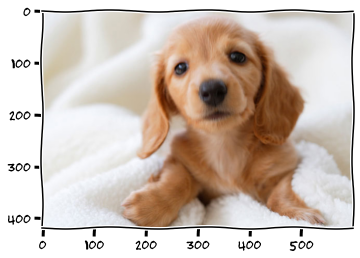

In [ ]:
plt.imshow(img)

- 텐서플로우 mnist 데이터 세트 이미지
- 2차원 28x28 흑백 이미지 

In [ ]:
tf.keras.datasets.mnist.load_data()[0][0][0]  #2차원 28x28 흑백이미지

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Print 이용하면 array() 생략 되기 때문에 유의

In [ ]:
print(tf.keras.datasets.mnist.load_data()[0][0][0])  #array() 안 나옴

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### \_\_repr__ 
- 객체 이름 호출시 실행됨
### \_\_str__
- print 실행시 실행됨 

In [ ]:
class X:
  def __repr__(self):
    return '1'
  def __str__(self):
    return '2'

In [ ]:
x=X()

In [ ]:
x

1

In [ ]:
print(x)

2


#### pprint

- 파이썬 공식 라이브러리에서 출력물을 보기 좋게 출력
- 위와 같은 이유 때문에 print 대신에 pprint 사용 
- Pretty print...

In [ ]:
from pprint import pprint

In [ ]:
pprint(tf.keras.datasets.mnist.load_data()[0][0][0] ,width=150)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

#### 행렬로 표현된 이미지 표현
1. opencv
  - 이미지를 이미지 변환+ 이미지 숨어있는 것을 찾음
  - 메모리 버그 존재

2. matplotlib 
  - 주로 사용할 라이브러리

### matplotlib
- pyplot
- 내부적으로 Numpy 데이터 포맷

####  state machine 
- 하나의 공간에서 가까운 것들의 상태를 변화시키는 Matlab 의 그래프 그리는 방식 가져옴
- 변수 지정 불필요 
- 빠르게 시각화 가능



In [ ]:
import matplotlib.pyplot as plt  #matplot

#### plt.matshow
- 기본적으로 RGB로 가정
- 2차원인 경우 흑백 이미지를 표현하지 못해서 디폴트 값으로 둠
- cmap : color map 변경
- 가변 키워드

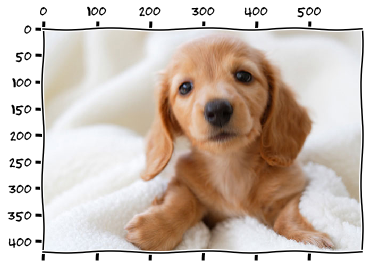

In [ ]:
plt.matshow(img)

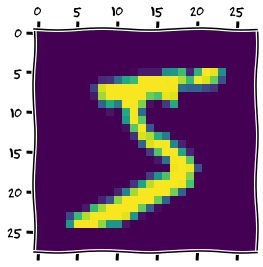

In [ ]:
plt.matshow(tf.keras.datasets.mnist.load_data()[0][0][0])

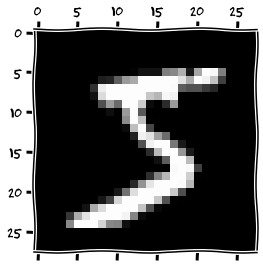

In [ ]:
plt.matshow(tf.keras.datasets.mnist.load_data()[0][0][0], cmap='gray') #color map

#### plt.imshow
- 범용적
- 키워드 방식으로 다양한 옵션 제공

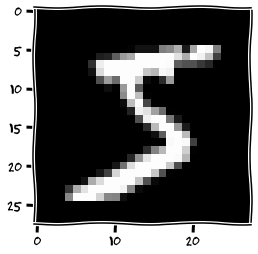

In [ ]:
plt.imshow(tf.keras.datasets.mnist.load_data()[0][0][0],cmap='gray')

- ; : 마지막에 ; 붙이면 out 안 보임
- 

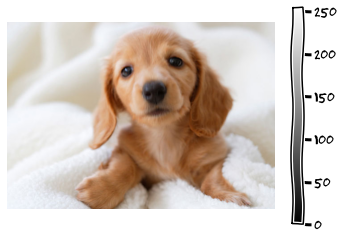

In [ ]:
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.colorbar(); #색상 정보

In [ ]:
plt.rcdefaults()  # 적용된 xkcd 서식 제거

([], <a list of 0 Text major ticklabel objects>)

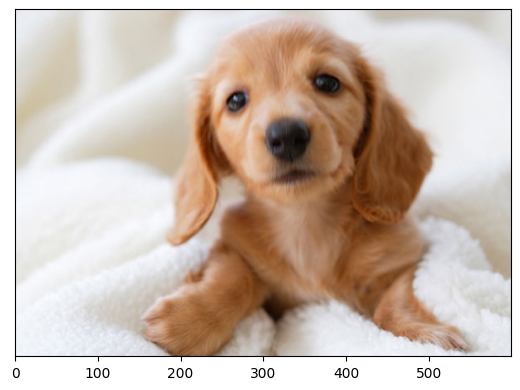

In [ ]:
plt.imshow(img,cmap='gray')
plt.yticks([])  #y축만 삭제

Text(0, 0.5, 'y')

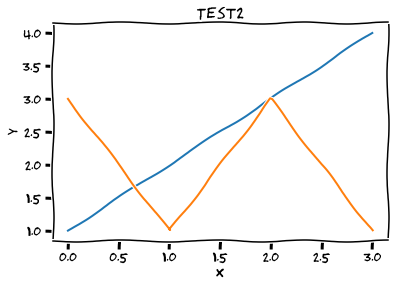

In [ ]:
plt.plot([1,2,3,4])
plt.title('Test2')
plt.plot([3,1,3,1])
plt.xlabel('x')
plt.ylabel('y')

#### ndarray
- array property : 
  - shape: 크기,차원, 색상정보
  - dtype
    - 기본 : uint8
      - tensor : float32
    - unsinged (부호가 없는)int 8
    - 0~255 (RGB 가 각각 255사이의 값을 갖음)
    > - Python 숫자형 : 
        - int
        - float
        - bool 
          - True / False
          - int 상속함
        - complex 복소수 j
     -  넘파이는 내부적으로 C언어로 만들어서 C데이터 타입 지원 

     > - 텐서플로우 : 텐서로 이미지 만들어 놓으면 matplotlib으로 볼수 없음

     

In [ ]:
img.shape  # 이전에 배운 @property () 없이 사용

(420, 600, 3)

In [ ]:
img.dtype #

dtype('uint8')

In [ ]:
np.sctypes  #각 데이터 타입별로 지원하는 데이터형

{'complex': [numpy.complex64, numpy.complex128, numpy.complex256],
 'float': [numpy.float16, numpy.float32, numpy.float64, numpy.float128],
 'int': [numpy.int8, numpy.int16, numpy.int32, numpy.int64],
 'others': [bool, object, bytes, str, numpy.void],
 'uint': [numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint64]}

In [ ]:
np.sctypes.keys()

dict_keys(['int', 'uint', 'float', 'complex', 'others'])

In [ ]:
np.sctypes.values()

dict_values([[<class 'numpy.int8'>, <class 'numpy.int16'>, <class 'numpy.int32'>, <class 'numpy.int64'>], [<class 'numpy.uint8'>, <class 'numpy.uint16'>, <class 'numpy.uint32'>, <class 'numpy.uint64'>], [<class 'numpy.float16'>, <class 'numpy.float32'>, <class 'numpy.float64'>, <class 'numpy.float128'>], [<class 'numpy.complex64'>, <class 'numpy.complex128'>, <class 'numpy.complex256'>], [<class 'bool'>, <class 'object'>, <class 'bytes'>, <class 'str'>, <class 'numpy.void'>]])

벡터 연산
 영상처리의 기본, 안에 있는 값을 변화 시키므로써 영상처리함
###  이미지 처리 
- 객체지향 패러다임
  - array programming
- 함수형 패러다임
#### crop
> Numpy Sclicing 5가지
  - 넘파이에서는 아주 빠른 속도로 처리
  - 확장해서 인덱싱,슬라이싱 제공 

### 1. [, , ]
- array[행][열]
- array[행, 열]


In [ ]:
a=np.arange(24).reshape(2,3,4)
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [ ]:
a[0][1][2]

6

In [ ]:
a[0,1,2]

6

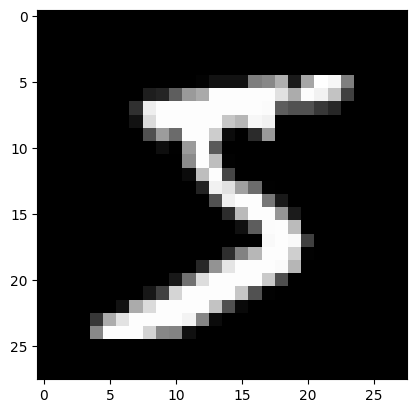

In [ ]:
img5=tf.keras.datasets.mnist.load_data()[0][0][0]
plt.imshow(img5, cmap='gray')

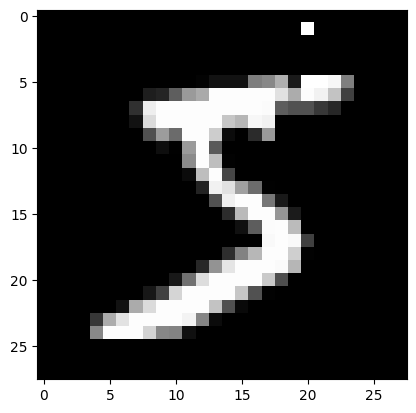

In [ ]:
img5[1,20]=255  #5,20 번째값 흰색으로 바뀌었음
plt.imshow(img5, cmap='gray')

- 인덱스와 슬라이싱 혼합

In [ ]:
a[0][1][2:]

array([6, 7])

In [ ]:
a[0,1,2:]

array([6, 7])

- indexing, slicing에 조건을 넣음

### 2. boolean indexing
  - true/flase 에따라 필터링해서 조건에 맞는 값만 인덱싱
  

In [ ]:
a%2==0  #broadcasting 

array([[[ True, False,  True, False],
        [ True, False,  True, False],
        [ True, False,  True, False]],

       [[ True, False,  True, False],
        [ True, False,  True, False],
        [ True, False,  True, False]]])

In [ ]:
a[a%2==0]  #짝수값만 가져옴

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22])

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips[tips.day=='Sun']  #일요일값만 추출

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


### 3. fancy indexing [[ ]]

In [ ]:
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [ ]:
a[(0,1),(1,1)]  #각 행렬에서 1번째줄 을 가져옴

array([[ 4,  5,  6,  7],
       [16, 17, 18, 19]])

In [ ]:
a[[0,1],[1,1]]

array([[ 4,  5,  6,  7],
       [16, 17, 18, 19]])

In [ ]:
a[[0]]  

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [ ]:
a[[1]]  

array([[[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [2]:
a=np.arange(24).reshape(4,3,2)
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

In [ ]:
a[[1,3]] #순서 바꾸기

array([[[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

In [ ]:
tips[['tip','size']]  #원하는 column 만 가져옴

,tip,size
0,1.01,2
1,1.66,3
2,3.50,3
3,3.31,2
4,3.61,4
...,...,...
239,5.92,3
240,2.00,2
241,2.00,2
242,1.75,2


### 4. indexing,slicing 혼합형
- indexing ,slicing 동시에 사용 가능


In [ ]:
a[0]  

array([[0, 1],
       [2, 3],
       [4, 5]])

In [ ]:
a[1,3:5]

array([], shape=(0, 2), dtype=int64)

뒤의 `,:` 생략가능

In [ ]:
a[0,:,:]  

array([[0, 1],
       [2, 3],
       [4, 5]])

In [ ]:
a[0] #상동

array([[0, 1],
       [2, 3],
       [4, 5]])

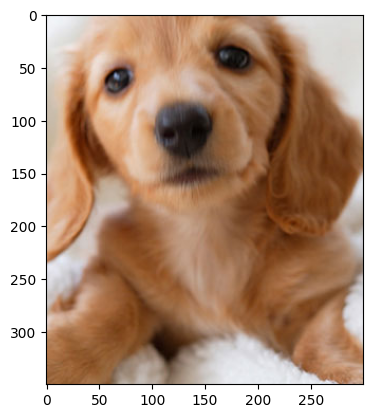

In [ ]:
plt.imshow(img[ 50:400,200:500,:]) #뒤의 : 생략 가능

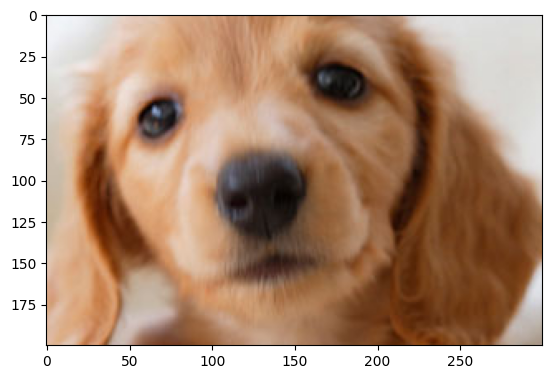

In [ ]:
plt.imshow(img[ 50:250,200:500])

여기서는 :,: 생략 불가

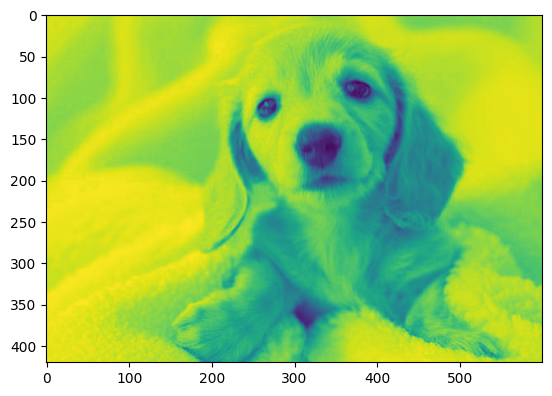

In [ ]:
plt.imshow(img[:,:,0]) #R 채널만 선택

In [ ]:
img[:,:,0].shape #2차원이 되었음

(420, 600)

3차원은 2차원 3개가 겹치는 것을 알 수 있음

### 5. [... ]
- 앞/뒤 상관 없이 :,: 연속으로 겹쳐 있을때 단축

In [ ]:
img[:,:,0] == img[...,0]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
img[0] == img[0,...]

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       ...,
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [ ]:
x=tf.constant(([1,2],[3,4]))
x

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [ ]:
x[:,:] #텐서 전체 슬라이싱

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [ ]:
x[...] #상동

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

#### slice
- 모든 연산자는 대체 가능


In [ ]:
slice(2,3)

slice(2, 3, None)

In [ ]:
a[slice(2,5)]

array([[[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

#### Index expression
- 더 복잡한 슬라이스 **가능함**

In [3]:
np.s_[2::2]

slice(2, None, 2)

In [4]:
a[np.s_[2::2]]

array([[[12, 13],
        [14, 15],
        [16, 17]]])